<a href="https://colab.research.google.com/github/jahnavigogia/aiml/blob/main/hospitalmortalityprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install pycaret
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
df= pd.read_csv("/content/drive/MyDrive/mortality.csv")

In [9]:
df.head()

,group,ID,outcome,age,gendera,BMI,hypertensive,atrialfibrillation,CHD with no MI,diabetes,...,Blood sodium,Blood calcium,Chloride,Anion gap,Magnesium ion,PH,Bicarbonate,Lactic acid,PCO2,EF
0,1,125047,0.0,72,1,37.588179,0,0,0,1,...,138.750000,7.463636,109.166667,13.166667,2.618182,7.230,21.166667,0.5,40.0,55
1,1,139812,0.0,75,2,NaN,0,0,0,0,...,138.888889,8.162500,98.444444,11.444444,1.887500,7.225,33.444444,0.5,78.0,55
2,1,109787,0.0,83,2,26.572634,0,0,0,0,...,140.714286,8.266667,105.857143,10.000000,2.157143,7.268,30.571429,0.5,71.5,35
3,1,130587,0.0,43,2,83.264629,0,0,0,0,...,138.500000,9.476923,92.071429,12.357143,1.942857,7.370,38.571429,0.6,75.0,55
4,1,138290,0.0,75,2,31.824842,1,0,0,0,...,136.666667,8.733333,104.500000,15.166667,1.650000,7.250,22.000000,0.6,50.0,55


In [10]:
df.describe()

,group,ID,outcome,age,gendera,BMI,hypertensive,atrialfibrillation,CHD with no MI,diabetes,...,Blood sodium,Blood calcium,Chloride,Anion gap,Magnesium ion,PH,Bicarbonate,Lactic acid,PCO2,EF
count,1177.000000,1177.000000,1176.000000,1177.000000,1177.000000,962.000000,1177.000000,1177.000000,1177.000000,1177.000000,...,1177.000000,1176.000000,1177.000000,1177.000000,1177.000000,885.000000,1177.000000,948.000000,883.000000,1177.000000
mean,1.299065,150778.120646,0.135204,74.055225,1.525064,30.188278,0.717927,0.451147,0.085811,0.421410,...,138.890016,8.500894,102.283835,13.925094,2.120169,7.378532,26.911766,1.853426,45.535382,48.715378
std,0.458043,29034.669513,0.342087,13.434061,0.499584,9.325997,0.450200,0.497819,0.280204,0.493995,...,4.151347,0.572263,5.339733,2.652732,0.251532,0.067320,5.167512,0.983819,12.711271,12.868436
min,1.000000,100213.000000,0.000000,19.000000,1.000000,13.346801,0.000000,0.000000,0.000000,0.000000,...,114.666667,6.700000,80.266667,6.636364,1.400000,7.090000,12.857143,0.500000,18.750000,15.000000
25%,1.000000,125603.000000,0.000000,65.000000,1.000000,24.326461,0.000000,0.000000,0.000000,0.000000,...,136.666667,8.148864,99.000000,12.250000,1.955556,7.334615,23.454545,1.200000,37.038462,40.000000
50%,1.000000,151901.000000,0.000000,77.000000,2.000000,28.312474,1.000000,0.000000,0.000000,0.000000,...,139.250000,8.500000,102.500000,13.666667,2.092308,7.380000,26.500000,1.600000,43.000000,55.000000
75%,2.000000,176048.000000,0.000000,85.000000,2.000000,33.633509,1.000000,1.000000,0.000000,1.000000,...,141.600000,8.869063,105.571429,15.416667,2.241667,7.430000,29.875000,2.200000,50.585784,55.000000
max,2.000000,199952.000000,1.000000,99.000000,2.000000,104.970366,1.000000,1.000000,1.000000,1.000000,...,154.736842,10.950000,122.526316,25.500000,4.072727,7.580000,47.666667,8.333333,98.600000,75.000000


In [11]:
df.isnull().sum()

,0
group,0
ID,0
outcome,1
age,0
gendera,0
BMI,215
hypertensive,0
atrialfibrillation,0
CHD with no MI,0
diabetes,0


In [12]:
df.shape

(1177, 51)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1177 entries, 0 to 1176
Data columns (total 51 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   group                     1177 non-null   int64  
 1   ID                        1177 non-null   int64  
 2   outcome                   1176 non-null   float64
 3   age                       1177 non-null   int64  
 4   gendera                   1177 non-null   int64  
 5   BMI                       962 non-null    float64
 6   hypertensive              1177 non-null   int64  
 7   atrialfibrillation        1177 non-null   int64  
 8   CHD with no MI            1177 non-null   int64  
 9   diabetes                  1177 non-null   int64  
 10  deficiencyanemias         1177 non-null   int64  
 11  depression                1177 non-null   int64  
 12  Hyperlipemia              1177 non-null   int64  
 13  Renal failure             1177 non-null   int64  
 14  COPD    

In [14]:
from sklearn.impute import SimpleImputer

si = SimpleImputer(missing_values=np.nan, strategy='mean')

In [15]:
float_col = df.select_dtypes(include='float64').columns

In [16]:
si.fit(df[float_col])

SimpleImputer()

In [17]:
df[float_col] = si.transform(df[float_col])

In [18]:
x = df.drop(columns='outcome')

y = df[['outcome']]

In [19]:
SI =  SimpleImputer(missing_values=np.nan, strategy="most_frequent")

In [20]:
SI.fit_transform(y)

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [21]:
y = pd.DataFrame(y, columns=['outcome'], dtype='int64')

In [22]:
df_final = x.copy()

df_final['outcome'] = y

In [23]:
df_final.isnull().sum()

,0
group,0
ID,0
age,0
gendera,0
BMI,0
hypertensive,0
atrialfibrillation,0
CHD with no MI,0
diabetes,0
deficiencyanemias,0


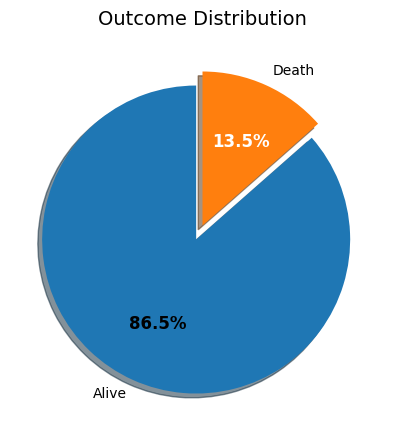

In [24]:
fig, ax = plt.subplots(figsize=(8,5), dpi=100)

patches, texts, autotexts = ax.pie(df_final['outcome'].value_counts(), autopct= '%1.1f%%', shadow=True,
                                   startangle=90, explode=(0.1, 0), labels=['Alive','Death'])

plt.setp(autotexts, size=12, color = 'black', weight='bold')
autotexts[1].set_color('white');

plt.title('Outcome Distribution', fontsize=14)
plt.show()

In [25]:
import plotly.express as px
fig = px.histogram(df, x="age", color="outcome", marginal="box", hover_data=df.columns)
fig.show()

In [26]:
fig = px.histogram(df, x="BMI", color="outcome", marginal="box", hover_data=df.columns)
fig.show()

In [27]:
fig = px.histogram(df, x="SP O2", color="outcome", marginal="box", hover_data=df.columns)
fig.show()

In [28]:
fig = px.histogram(df, x="heart rate", color="outcome", marginal="box", hover_data=df.columns)
fig.show()

In [29]:
df_final['gendera'].value_counts()

,count
gendera,
2,618
1,559


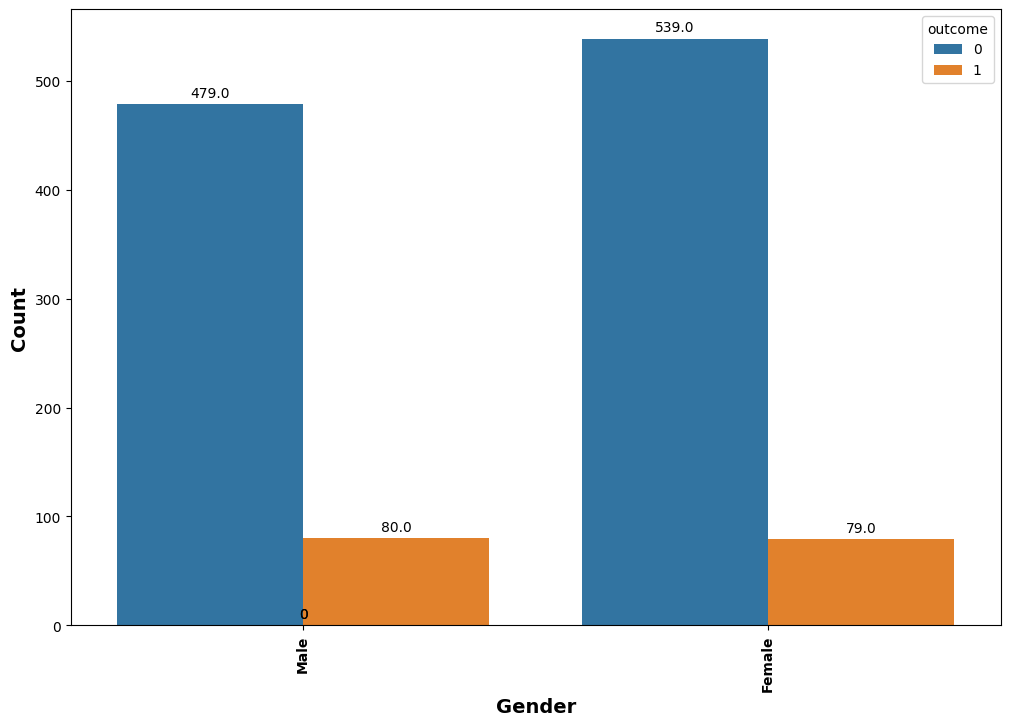

In [35]:
plt.figure(figsize=(12,8))
plot = sns.countplot(data=df_final, x='gendera', hue='outcome')
plt.xlabel('Gender', fontsize=14, weight='bold')
plt.ylabel('Count', fontsize=14, weight='bold')
plt.xticks(np.arange(2), ['Male', 'Female'], rotation='vertical', weight='bold')

for i in plot.patches:
  plot.annotate(format(i.get_height()),
                (i.get_x() + i.get_width()/2,
                 i.get_height()), ha='center', va='center',
                size=10, xytext=(0,8),
                textcoords='offset points')

plt.show()

In [31]:
col = ['group', 'gendera', 'hypertensive','atrialfibrillation', 'CHD with no MI', 'diabetes', 'deficiencyanemias',
       'depression', 'Hyperlipemia', 'Renal failure', 'COPD', 'outcome']

In [32]:
corr = df_final[col].corr()

<Axes: >

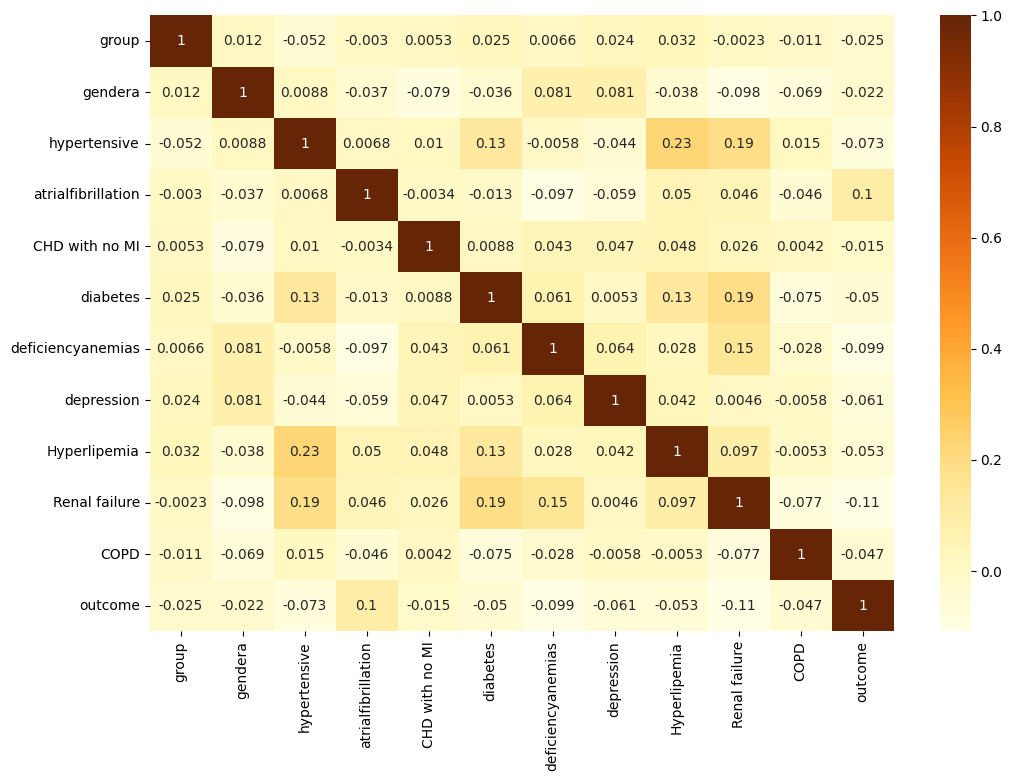

In [33]:
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap='YlOrBr')

<Axes: ylabel='Density'>

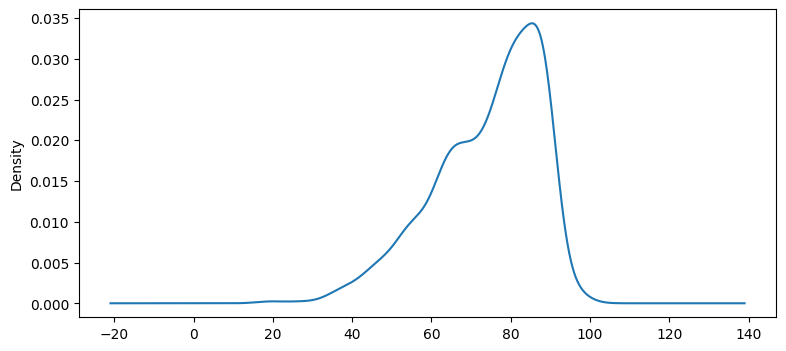

In [34]:
plt.figure(figsize=(9,4))
df_final['age'].plot(kind='kde')

<Axes: ylabel='Density'>

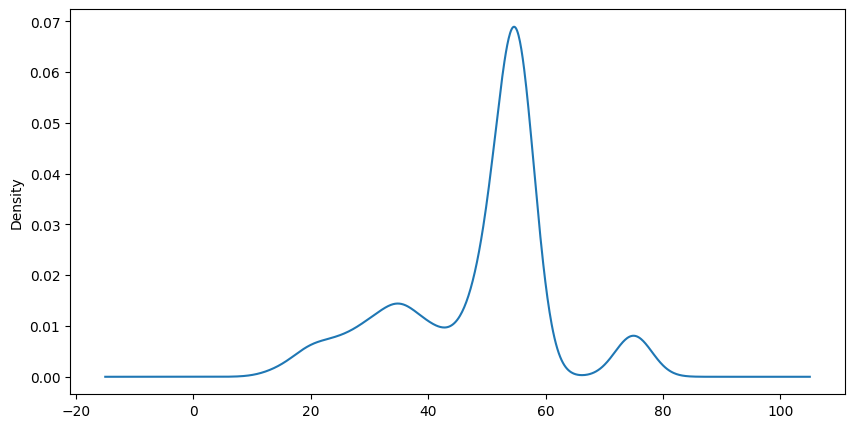

In [36]:
plt.figure(figsize=(10,5))
df_final['EF'].plot(kind='kde')

<Axes: ylabel='Density'>

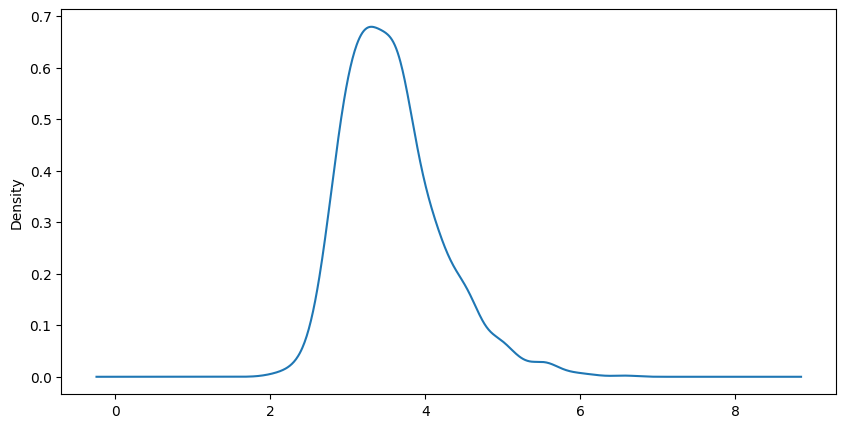

In [37]:
plt.figure(figsize=(10,5))
df_final['RBC'].plot(kind='kde')

<Axes: ylabel='Density'>

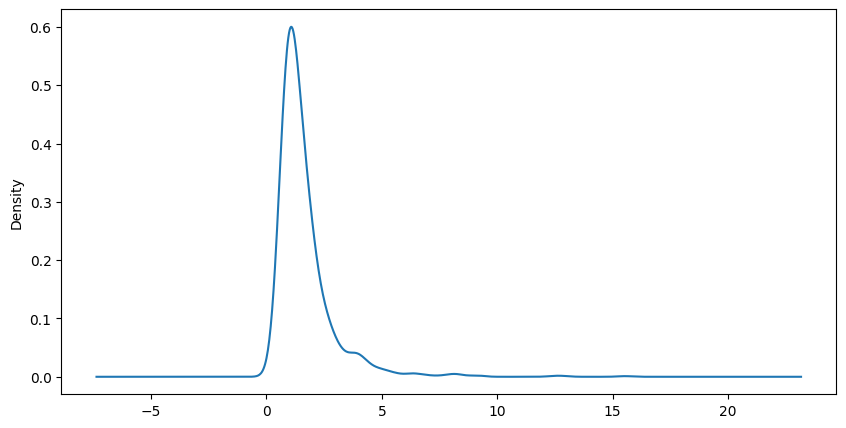

In [38]:
plt.figure(figsize=(10,5))
df_final['Creatinine'].plot(kind='kde')

<Axes: ylabel='Density'>

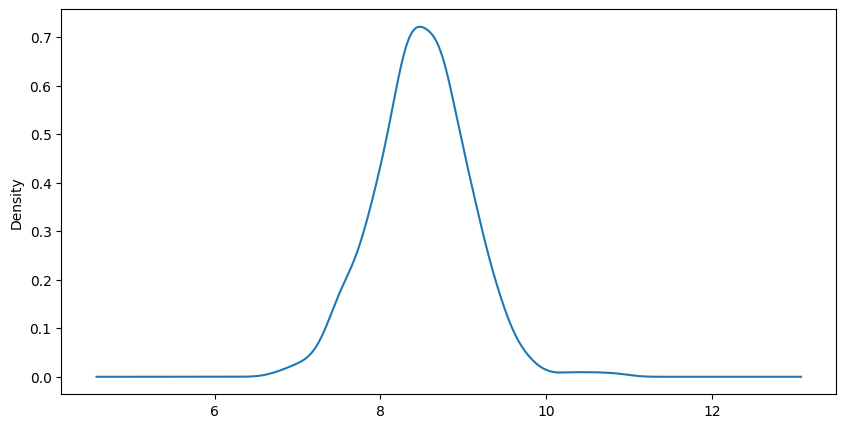

In [39]:
plt.figure(figsize=(10,5))
df_final['Blood calcium'].plot(kind='kde')

In [40]:
df_final.head()

,group,ID,age,gendera,BMI,hypertensive,atrialfibrillation,CHD with no MI,diabetes,deficiencyanemias,...,Blood calcium,Chloride,Anion gap,Magnesium ion,PH,Bicarbonate,Lactic acid,PCO2,EF,outcome
0,1,125047,72,1,37.588179,0,0,0,1,1,...,7.463636,109.166667,13.166667,2.618182,7.230,21.166667,0.5,40.0,55,0
1,1,139812,75,2,30.188278,0,0,0,0,1,...,8.162500,98.444444,11.444444,1.887500,7.225,33.444444,0.5,78.0,55,0
2,1,109787,83,2,26.572634,0,0,0,0,1,...,8.266667,105.857143,10.000000,2.157143,7.268,30.571429,0.5,71.5,35,0
3,1,130587,43,2,83.264629,0,0,0,0,0,...,9.476923,92.071429,12.357143,1.942857,7.370,38.571429,0.6,75.0,55,0
4,1,138290,75,2,31.824842,1,0,0,0,1,...,8.733333,104.500000,15.166667,1.650000,7.250,22.000000,0.6,50.0,55,0


In [41]:
x = df_final.drop(columns='outcome')
y = df_final[['outcome']]

In [42]:
from sklearn.preprocessing import StandardScaler

In [43]:
scale= StandardScaler()

In [44]:
scaled= scale.fit_transform(x)

In [45]:
final_x= pd.DataFrame(scaled,columns= x.columns)

In [46]:
final_x.head()

,group,ID,age,gendera,BMI,hypertensive,atrialfibrillation,CHD with no MI,diabetes,deficiencyanemias,...,Blood sodium,Blood calcium,Chloride,Anion gap,Magnesium ion,PH,Bicarbonate,Lactic acid,PCO2,EF
0,-0.653197,-0.886597,-0.153051,-1.051449,8.781267e-01,-1.595362,-0.906632,-0.306376,1.171744,1.396379,...,-0.033742,-1.814098,1.289532,-0.286026,1.980755,-2.545867,-1.112245,-1.533672,-0.503052,0.488583
1,-0.653197,-0.377851,0.070357,0.951068,8.431822e-16,-1.595362,-0.906632,-0.306376,-0.853429,1.396379,...,-0.000272,-0.591830,-0.719329,-0.935527,-0.925400,-2.631567,1.264720,-1.533672,2.950362,0.488583
2,-0.653197,-1.412399,0.666111,0.951068,-4.290589e-01,-1.595362,-0.906632,-0.306376,-0.853429,1.396379,...,0.439627,-0.409649,0.669477,-1.480271,0.147056,-1.894540,0.708507,-1.533672,2.359646,-1.066269
3,-0.653197,-0.695710,-2.312661,0.951068,6.298430e+00,-1.595362,-0.906632,-0.306376,-0.853429,-0.716138,...,-0.093989,1.707012,-1.913344,-0.591321,-0.705227,-0.146241,2.257299,-1.420354,2.677724,0.488583
4,-0.653197,-0.430293,0.070357,0.951068,1.942067e-01,0.626817,-0.906632,-0.306376,-0.853429,1.396379,...,-0.535801,0.406521,0.415209,0.468234,-1.870013,-2.203063,-0.950913,-1.420354,0.405741,0.488583


In [47]:
y.head()

,outcome
0,0
1,0
2,0
3,0
4,0


In [48]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=123)

In [49]:
print(x_train.shape, x_test.shape)

(823, 50) (354, 50)


In [50]:
x_train.drop(columns = 'ID', inplace=True)
x_test.drop(columns='ID', inplace=True)

In [ ]:
x_train.head()

In [51]:
from xgboost import XGBClassifier, plot_tree, plot_importance

In [52]:
xgb = XGBClassifier(random_state=42)

In [53]:
xgb.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [54]:
pred = xgb.predict(x_test)

In [55]:
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [56]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [57]:
cf = confusion_matrix(y_test, pred)

In [58]:
cf

array([[298,   3],
       [ 37,  16]])

In [59]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94       301
           1       0.84      0.30      0.44        53

    accuracy                           0.89       354
   macro avg       0.87      0.65      0.69       354
weighted avg       0.88      0.89      0.86       354



In [60]:
combine = np.concatenate((y_test.values.reshape(len(y_test),1), pred.reshape(len(pred),1)),1)

In [61]:
combine_result = pd.DataFrame(combine,  columns=['y_test', 'y_pred'])

In [62]:
combine_result

,y_test,y_pred
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
349,1,1
350,0,0
351,0,0
352,0,0


In [66]:
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay
#Instead of using plot_roc_curve, use RocCurveDisplay.from_estimator or RocCurveDisplay.from_predictions
#RocCurveDisplay.from_estimator(estimator, X_test, y_test)
#Instead of using plot_precision_recall_curve, use PrecisionRecallDisplay.from_estimator or PrecisionRecallDisplay.from_predictions
#PrecisionRecallDisplay.from_estimator(estimator, X_test, y_test)

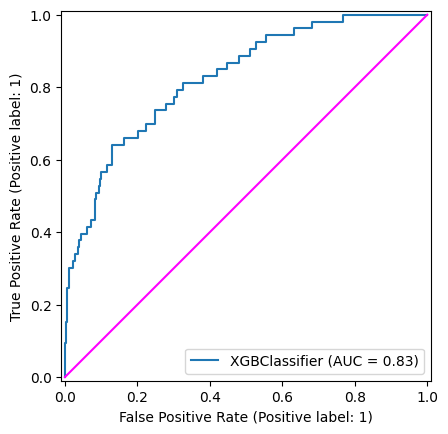

In [68]:
RocCurveDisplay.from_estimator(xgb, x_test, y_test)
plt.plot([0,1], [0,1], color='magenta', ls='-')
plt.show()

In [65]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.8/165.8 kB 8.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 28.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 48.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 56.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 52.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 69.4 MB/s eta 0:00:00
   ━━━━━

In [3]:
df= pd.read_csv("/content/drive/MyDrive/mortality.csv")

In [7]:
df = df.dropna(subset=['outcome'])

In [10]:
!pip install scikit-learn==0.20.0 # Downgrade scikit-learn to version 0.20.0
from pycaret.classification import setup, compare_models, create_model, predict_model, evaluate_model, finalize_model, save_model, load_model

  Using cached scikit-learn-0.20.0.tar.gz (28.1 MB)
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for scikit-learn
  Running setup.py clean for scikit-learn
Failed to build scikit-learn
ERROR: ERROR: Failed to build installable wheels for some pyproject.toml based projects (scikit-learn)


In [5]:
df.head()

,group,ID,outcome,age,gendera,BMI,hypertensive,atrialfibrillation,CHD with no MI,diabetes,...,Blood sodium,Blood calcium,Chloride,Anion gap,Magnesium ion,PH,Bicarbonate,Lactic acid,PCO2,EF
0,1,125047,0.0,72,1,37.588179,0,0,0,1,...,138.750000,7.463636,109.166667,13.166667,2.618182,7.230,21.166667,0.5,40.0,55
1,1,139812,0.0,75,2,NaN,0,0,0,0,...,138.888889,8.162500,98.444444,11.444444,1.887500,7.225,33.444444,0.5,78.0,55
2,1,109787,0.0,83,2,26.572634,0,0,0,0,...,140.714286,8.266667,105.857143,10.000000,2.157143,7.268,30.571429,0.5,71.5,35
3,1,130587,0.0,43,2,83.264629,0,0,0,0,...,138.500000,9.476923,92.071429,12.357143,1.942857,7.370,38.571429,0.6,75.0,55
4,1,138290,0.0,75,2,31.824842,1,0,0,0,...,136.666667,8.733333,104.500000,15.166667,1.650000,7.250,22.000000,0.6,50.0,55


In [8]:
model= setup(data= df, target= 'outcome')

,Description,Value
0,Session id,7509
1,Target,outcome
2,Target type,Binary
3,Original data shape,"(1176, 51)"
4,Transformed data shape,"(1176, 51)"
5,Transformed train set shape,"(823, 51)"
6,Transformed test set shape,"(353, 51)"
7,Numeric features,50
8,Rows with missing values,63.6%
9,Preprocess,True


In [11]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8809,0.8067,0.1364,0.7167,0.2245,0.1999,0.2833,0.8530
gbc,Gradient Boosting Classifier,0.8809,0.7957,0.2356,0.5700,0.3272,0.2837,0.3181,1.0810
lightgbm,Light Gradient Boosting Machine,0.8809,0.8257,0.2265,0.5933,0.3226,0.2788,0.3168,5.3850
et,Extra Trees Classifier,0.8773,0.8293,0.1000,0.6500,0.1718,0.1525,0.2342,0.3930
xgboost,Extreme Gradient Boosting,0.8773,0.8047,0.2530,0.6257,0.3492,0.2962,0.3373,0.2880
lda,Linear Discriminant Analysis,0.8772,0.7880,0.3341,0.5091,0.3993,0.3415,0.3501,0.0820
ridge,Ridge Classifier,0.8761,0.7894,0.2083,0.5729,0.2937,0.2493,0.2876,0.2100
lr,Logistic Regression,0.8748,0.7407,0.2091,0.5133,0.2928,0.2471,0.2751,1.7280
ada,Ada Boost Classifier,0.8724,0.7748,0.3697,0.5202,0.4268,0.3607,0.3687,0.8660
dummy,Dummy Classifier,0.8651,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0480


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/pycaret/internal/pycaret_experiment/supervised_experiment.py:323: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  master_display_.apply(


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=100, n_jobs=-1,
                       oob_score=False, random_state=7509, verbose=0,
                       warm_start=False)

In [12]:
ridge= create_model('ridge')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8916,0.8914,0.3636,0.6667,0.4706,0.4159,0.4397
1,0.9036,0.8068,0.3636,0.8000,0.5000,0.4548,0.4984
2,0.8434,0.7359,0.0833,0.3333,0.1333,0.0801,0.1039
3,0.8902,0.8271,0.2727,0.7500,0.4000,0.3538,0.4092
4,0.9146,0.9206,0.3636,1.0000,0.5333,0.4974,0.5753
5,0.8537,0.6876,0.0000,0.0000,0.0000,-0.0229,-0.0437
6,0.8537,0.7516,0.2727,0.4286,0.3333,0.2557,0.2639
7,0.8780,0.6901,0.0909,1.0000,0.1667,0.1476,0.2823
8,0.8415,0.7529,0.0000,0.0000,0.0000,-0.0431,-0.0622


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [16]:
from sklearn.model_selection import train_test_split # Importing the required function

data_train, data_test = train_test_split(df, test_size=0.2, random_state=42)  # Adjust test_size and random_state as needed

# Then, you can access x_test (features of the testing set)
x_test = data_test.drop('outcome', axis=1)  # Assuming 'outcome' is your target column

# Now, you can use x_test in the predict_model function:
pred = predict_model(ridge, data=x_test)

In [17]:
pred

,group,ID,age,gendera,BMI,hypertensive,atrialfibrillation,CHD with no MI,diabetes,deficiencyanemias,...,Blood calcium,Chloride,Anion gap,Magnesium ion,PH,Bicarbonate,Lactic acid,PCO2,EF,prediction_label
107,1,109285,63,1,22.037041,1,0,0,0,0,...,8.325000,111.555557,18.333334,1.890000,7.295000,14.333333,1.060000,NaN,55,0
591,1,120208,81,1,22.538233,1,1,0,0,0,...,8.412500,100.888885,15.555555,1.837500,NaN,25.333334,2.800000,NaN,50,0
81,1,148326,80,2,23.030788,1,0,0,0,0,...,8.685715,96.900002,10.800000,1.744444,7.365000,43.833332,1.000000,84.250000,55,0
323,1,168993,87,2,17.265625,1,0,0,0,0,...,8.600000,105.857140,13.400000,1.971429,7.404444,21.000000,1.600000,36.000000,75,0
904,2,199677,83,1,24.357647,1,1,0,1,1,...,8.783334,103.250000,13.000000,2.390000,NaN,35.000000,1.300000,NaN,55,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333,1,128313,79,1,NaN,1,1,0,1,1,...,8.937500,100.375000,13.500000,2.087500,7.260000,30.500000,1.600000,76.750000,50,0
661,1,117795,79,1,28.279182,1,1,0,0,0,...,7.533333,107.500000,20.250000,1.900000,7.415000,24.750000,4.950000,41.000000,40,1
538,1,184941,39,1,NaN,1,0,0,0,0,...,9.066667,93.599998,11.600000,2.175000,7.441000,37.799999,2.350000,60.500000,55,0
270,1,112464,66,1,28.601566,1,0,1,0,1,...,8.111111,99.727272,13.000000,2.145455,7.430000,27.181818,1.433333,39.500000,35,0
